In [1]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use ('ggplot')
import numpy as np

In [2]:
X = np.array([[1,2],
              [1.5,1.8],
              [5,8],
              [8,8],
              [1, 0.6],
              [9,11]
             ])


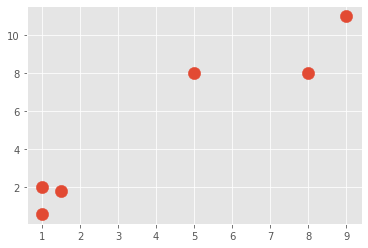

In [3]:
plt.scatter(X[:,0], X[:,1], s=150)
plt.show()

In [68]:
# we first assign centroids. In this case we can just pick the first two data points
# because we are just splitting into two clusters we just assign one value to the first
# cluster and another value to the other cluster

# for this first iteration we are just assigning the rest of the values 
# based on their proximity to these centroids

centroids = {}

centroids[0] = X[0]
centroids[1] = X[1]

centroids

{0: array([1., 2.]), 1: array([1.5, 1.8])}

In [72]:
# now we create another dictionary called assignments that will
# contain the cluster/data assignments 

assignments = {}

# we then take each point and measure it against each centroid
# in this first example we measure point one against the first and second centroids
# as expected the first point minus the first centroid is zero because they are the
# same. The first point subtracted from the second centroid shows a distance difference
# We also take the Euclidean norm (distance) 
print(np.linalg.norm(X[0] - centroids[0]))
print(np.linalg.norm(X[0] - centroids[1]))



0.0
0.5385164807134504


In [77]:
# we then take the norm of the point we are evaluating against each
# centroid and we find the lowest value
# for example on the third point
# we find the min and its index so we can add the point to the
# appropriate key in the dictionary

d1 = np.linalg.norm(X[2] - centroids[0])
d2 = np.linalg.norm(X[2] - centroids[1])
d = [d1,d2]

print(d)
print(min(d))
print(d.index(min(d)))

[7.211102550927978, 7.119691004531026]
7.119691004531026
1


In [85]:
[centroids[c] for c in centroids]

[array([1., 2.]), array([1.5, 1.8])]

In [92]:
X

array([[ 1. ,  2. ],
       [ 1.5,  1.8],
       [ 5. ,  8. ],
       [ 8. ,  8. ],
       [ 1. ,  0.6],
       [ 9. , 11. ]])

In [104]:
{i: [] for i in range(2)}

{0: [], 1: []}

In [88]:
class KMeans:
    
    def __init__(self, k=2, tol=0.5, max_iter=1001):
        self.k = k
        self.tol = tol
        self.max_iter = max_iter
        
    def fit(self, data):
        
        # assign first two pieces of data to centroids
        self.centroids = {i: data[i] for i in range(self.k)}
        
        for i in range(self.max_iter):
                
            self.assignments = {i: [] for i in range(self.k)}
            
            for d in data:
                self.assignments[np.argmin([np.linalg.norm(d - c) for c in self.centroids.values()])].append(d)
            
            prev_centroids = dict(self.centroids)
            
            for a in self.assignments:
                self.centroids[a] = np.average(self.assignments[a], axis=0)
                
            optimized = True
            
            for c in self.centroids:
                org, cur = prev_centroids[c], self.centroids[c]
                
                if np.sum(cur-org/org*100) > self.tol:
                    optimized = False
                    
                if optimized:
                    break
                    
        data = {'clustered': self.assignments, 'centroids': self.centroids}
                    
        return data
    
    def predict(self, data):
        
        classification = np.argmin([np.linalg.norm(data - c) for c in self.centroids.values()])
        return classification

In [89]:
clf = KMeans()
clustered_data = clf.fit(X)

In [90]:
clustered_data

{'clustered': {0: [array([1., 2.]), array([1.5, 1.8]), array([1. , 0.6])],
  1: [array([5., 8.]), array([8., 8.]), array([ 9., 11.])]},
 'centroids': {0: array([1.16666667, 1.46666667]),
  1: array([7.33333333, 9.        ])}}

In [104]:
X

array([[ 1. ,  2. ],
       [ 1.5,  1.8],
       [ 5. ,  8. ],
       [ 8. ,  8. ],
       [ 1. ,  0.6],
       [ 9. , 11. ]])

In [109]:
clustered_data['centroids'][1]

array([7.33333333, 9.        ])

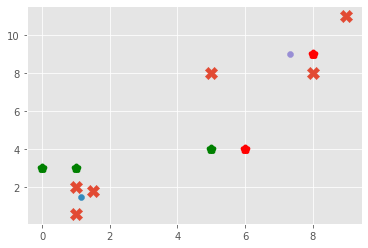

In [110]:
test = np.array([[1,3],
                 [8,9],
                 [0,3],
                 [5,4],
                 [6,4]
                ])

colors = 10*["g","r","c","b","k"]

for t in test:
    tmp = clf.predict(t)
    plt.scatter(t[0], t[1], marker="*", color=colors[tmp], s=25, linewidths=5)

plt.scatter(X[:,0], X[:,1], marker="X", s=150)

for i in range(2):
    x = clustered_data['centroids'][i]
    plt.scatter(x[0],x[1])
    
plt.show()

In [120]:
# now that we see what is going on at each step all we need to do is loop through
# all our points and see if they are close to centroid 0 or 1

assignments = {0:[], 1:[]}

for x in X:
    # for each point find index of the closet centroid
    assignments[np.argmin([np.linalg.norm(x - c) for c in centroids.values()])].append(x)
    #idx = np.argmin([np.linalg.norm(x - c) for c in centroids.values()])
    #assignments[idx].append(x)  

In [121]:
assignments

{0: [array([1., 2.])],
 1: [array([1.5, 1.8]),
  array([5., 8.]),
  array([8., 8.]),
  array([1. , 0.6]),
  array([ 9., 11.])]}

In [105]:
centroids = {}
print(centroids)

for i in range(2):
    centroids[i] = X[i]
    
print(centroids)

{}
{0: array([1., 2.]), 1: array([1.5, 1.8])}


In [56]:
class K_Means:
    
    def __init__(self, k=2, tol=0.001, max_iter=300):
        self.k = k
        self.tol = tol
        self.max_iter = max_iter
        
    def fit(self, data):
        self.centroids = {}
        
        # k classes default=2
        for i in range(self.k):
            # set the first two centroids to the first two data points
            self.centroids[i] = data[i]
        
        for i in range(self.max_iter):
            # contains centriods and classifications
            self.classifications = {}
            
            for i in range(self.k):
                self.classifications[i] = []
                
            for d in data:
                distances = [np.linalg.norm(d - self.centroids[centroid]) for centroid in self.centroids]
                classification = distances.index(min(distances))
                self.classifications[classification].append(d)
                
            prev_centroids = dict(self.centroids)
            
            for classification in self.classifications:
                pass
                #self.centroids[classification] = np.average(self.classifications[classification], axis=0)
                          
    def predict(self, data):
        pass

In [58]:
clf = K_Means()
clf.fit(X)

In [62]:
clf.centroids

{0: array([1., 2.]), 1: array([1.5, 1.8])}